In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read CSV file
FILE_DIR="/content/drive/Shareddrives/Capstone Melati/Dataset/bodyfat.csv"
df = pd.read_csv(FILE_DIR)

df.head(3)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6


In [4]:
# delete unused columns
df.drop(columns=['Density', 'Knee'], inplace=True)

df.head(3)

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Ankle,Biceps,Forearm,Wrist
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,21.9,32.0,27.4,17.1
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,23.4,30.5,28.9,18.2
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,24.0,28.8,25.2,16.6


In [5]:
df.describe()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,23.102381,32.273413,28.663889,18.229762
std,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,1.694893,3.021274,2.020691,0.933585
min,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,19.100000,24.800000,21.000000,15.800000
25%,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,22.000000,30.200000,27.300000,17.600000
50%,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,22.800000,32.050000,28.700000,18.300000
75%,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,24.000000,34.325000,30.000000,18.800000
max,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,33.900000,45.000000,34.900000,21.400000


In [6]:
# Drop outlier rows
index = df[ (df['BodyFat'] <= 4) | (df['BodyFat'] >= 40) ].index
df.drop(index , inplace=True)
df.describe()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Ankle,Biceps,Forearm,Wrist
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,19.421399,45.094650,179.940123,70.274691,38.048148,101.041152,92.843621,100.088889,59.614815,23.143210,32.380247,28.712346,18.260082
std,7.716846,12.682522,28.794240,3.646493,2.417025,8.095272,10.302069,6.952186,5.139447,1.704244,2.975440,2.019249,0.928214
min,4.100000,22.000000,125.000000,29.500000,31.100000,85.100000,72.800000,85.300000,49.300000,19.100000,25.300000,21.000000,15.800000
25%,13.300000,36.500000,160.125000,68.500000,36.400000,95.400000,85.850000,95.700000,56.350000,22.050000,30.300000,27.300000,17.600000
50%,19.500000,44.000000,177.000000,70.250000,38.000000,99.800000,91.500000,99.300000,59.100000,22.900000,32.100000,28.800000,18.300000
75%,25.300000,54.000000,197.500000,72.250000,39.500000,105.450000,99.450000,103.550000,62.750000,24.000000,34.400000,30.050000,18.800000
max,38.100000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,33.900000,45.000000,34.900000,21.400000


In [7]:
# Rename columns to match BodyM dataset
rename_dict = {'Age':'age', 'Weight':'weight', 'Height':'height', 'Neck':'neck', 'Chest':'chest', 'Abdomen':'waist', 'Hip':'hip', 'Thigh':'thigh', 'Ankle':'ankle', 'Biceps':'bicep', 'Forearm':'forearm', 'Wrist':'wrist'}
df.rename(columns=rename_dict, inplace=True)

# Convert weight from lbs to kg
df['weight'] = df['weight'] * 0.453592
# Convert height from cm to inches to cm
df['height'] = df['height'] * 2.54

df.head(3)

,BodyFat,age,weight,height,neck,chest,waist,hip,thigh,ankle,bicep,forearm,wrist
0,12.3,23,69.966566,172.085,36.2,93.1,85.2,94.5,59.0,21.9,32.0,27.4,17.1
1,6.1,22,78.584814,183.515,38.5,93.6,83.0,98.7,58.7,23.4,30.5,28.9,18.2
2,25.3,22,69.853168,168.275,34.0,95.8,87.9,99.2,59.6,24.0,28.8,25.2,16.6


In [8]:
# Select target and features for neck prediction
target_neck = "neck"
features_neck = ['age', 'weight', 'height', 'chest', 'waist', 'hip', 'thigh', 'ankle', 'bicep', 'forearm', 'wrist']

# Create X & y for neck prediction
X = df[features_neck]
y = df[target_neck]

# Split the data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(194, 11) (49, 11) (194,) (49,)


In [10]:
# Build checkpoint for saving the best model
cc_neck = ModelCheckpoint('best_model_neck.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

# Create a Normalization layer and set its internal state using the training data (z-score normalization aka standardization)
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train)

# Build the model for neck prediction
model_neck = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(11)),
    normalizer,
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model for neck prediction
model_neck.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])

In [11]:
model_neck.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 11)                23        
 on)                                                             
                                                                 
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2244 (8.77 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 23 (96.00 Byte)
_________________________________________________________________


In [12]:
# Fit the model for 1500 epochs
model_neck.fit(
    X_train, y_train,
    epochs=1500,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[cc_neck]
)

# Load the best model
model_neck = tf.keras.models.load_model('best_model_neck.h5')

Epoch 1/1500
6/7 [========================>.....] - ETA: 0s - loss: 38.0848 - mae: 38.0848 
Epoch 1: val_loss improved from inf to 37.78384, saving model to best_model_neck.h5
7/7 [==============================] - 5s 174ms/step - loss: 38.0635 - mae: 38.0635 - val_loss: 37.7838 - val_mae: 37.7838
Epoch 2/1500
1/7 [===>..........................] - ETA: 0s - loss: 38.1183 - mae: 38.1183
Epoch 2: val_loss improved from 37.78384 to 37.64316, saving model to best_model_neck.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Streaming output truncated to the last 5000 lines.
Epoch 251/1500
1/7 [===>..........................] - ETA: 0s - loss: 0.8751 - mae: 0.8751
Epoch 251: val_loss did not improve from 0.92567
7/7 [==============================] - 0s 10ms/step - loss: 0.9845 - mae: 0.9845 - val_loss: 1.1648 - val_mae: 1.1648
Epoch 252/1500
1/7 [===>..........................] - ETA: 0s - loss: 0.8101 - mae: 0.8101
Epoch 252: val_loss did not improve from 0.92567
7/7 [==============================] - 0s 11ms/step - loss: 1.0024 - mae: 1.0024 - val_loss: 1.1343 - val_mae: 1.1343
Epoch 253/1500
1/7 [===>..........................] - ETA: 0s - loss: 0.7530 - mae: 0.7530
Epoch 253: val_loss did not improve from 0.92567
7/7 [==============================] - 0s 13ms/step - loss: 0.8993 - mae: 0.8993 - val_loss: 1.1737 - val_mae: 1.1737
Epoch 254/1500
1/7 [===>..........................] - ETA: 0s - loss: 0.9455 - mae: 0.9455
Epoch 254: val_loss did not improve from 0.92567
7/7 [==============================

In [13]:
# Evaluate the model for neck prediction
model_neck_loss, model_neck_mae = model_neck.evaluate(X_test, y_test)

# Predict Neck
test_pred = model_neck.predict(X_test)

2/2 [==============================] - 0s 7ms/step


In [14]:
# Ensure 'y_test' and 'test_pred' are 1D
y_test_1D = tf.squeeze(y_test)
test_pred_1D = tf.squeeze(test_pred)

# Create the DataFrame to compare the result with actual value
comparison_df = pd.DataFrame({'Actual': y_test_1D, 'Predicted': test_pred_1D})
# Calculate the difference
comparison_df['Difference'] = comparison_df['Actual'] - comparison_df['Predicted']
# Round the values to two decimal places
comparison_df = comparison_df.round(2)

# Display the DataFrame
print(comparison_df.head(10))
print(comparison_df.describe())

   Actual  Predicted  Difference
0    34.5  35.139999       -0.64
1    36.4  36.959999       -0.56
2    37.0  37.400002       -0.40
3    38.8  41.349998       -2.55
4    34.9  35.770000       -0.87
5    35.3  35.750000       -0.45
6    41.1  39.529999        1.57
7    35.6  36.680000       -1.08
8    42.1  39.180000        2.92
9    38.3  38.570000       -0.27
          Actual  Predicted  Difference
count  49.000000  49.000000   49.000000
mean   37.885714  37.767754    0.117959
std     2.114336   1.835812    1.144616
min    32.800000  33.810001   -2.550000
25%    36.400000  36.639999   -0.780000
50%    37.800000  37.540001    0.050000
75%    38.900000  39.180000    0.760000
max    42.100000  41.349998    2.920000


In [15]:
def predict_bodyfat(waist, neck, height, is_male=True, hip=None):
    if is_male:
        bodyfat_percentage = 495 / (1.0324 - 0.19077 * np.log10(waist - neck) + 0.15456 * np.log10(height)) - 450
    else:
        if hip is None:
            raise ValueError("Hip measurement is required for females.")
        bodyfat_percentage = 495 / (1.29579 - 0.35004 * np.log10(waist + hip - neck) + 0.22100 * np.log10(height)) - 450

    return bodyfat_percentage

In [16]:
# Apply neck prediction to each row in df and save as new column in df
df['Predicted_Neck'] = model_neck.predict(df[features_neck])

# Apply the prediction function to each row (this dataset only contain measurements for male)
df['Predicted_BodyFat'] = df.apply(lambda x: predict_bodyfat(x['waist'], x['Predicted_Neck'], x['height']), axis=1)

# Calculate the BodyFat prediction error
df['BodyFat_Error'] = df['BodyFat'] - df['Predicted_BodyFat']

8/8 [==============================] - 0s 2ms/step


In [17]:
df[['BodyFat', 'Predicted_BodyFat', 'BodyFat_Error']].describe()

,BodyFat,Predicted_BodyFat,BodyFat_Error
count,243.000000,243.000000,243.000000
mean,19.421399,21.768312,-2.346913
std,7.716846,5.959345,4.617417
min,4.100000,8.184323,-25.271544
25%,13.300000,17.844588,-5.771842
50%,19.500000,21.591685,-2.188530
75%,25.300000,25.216684,0.867331
max,38.100000,58.171544,8.956186


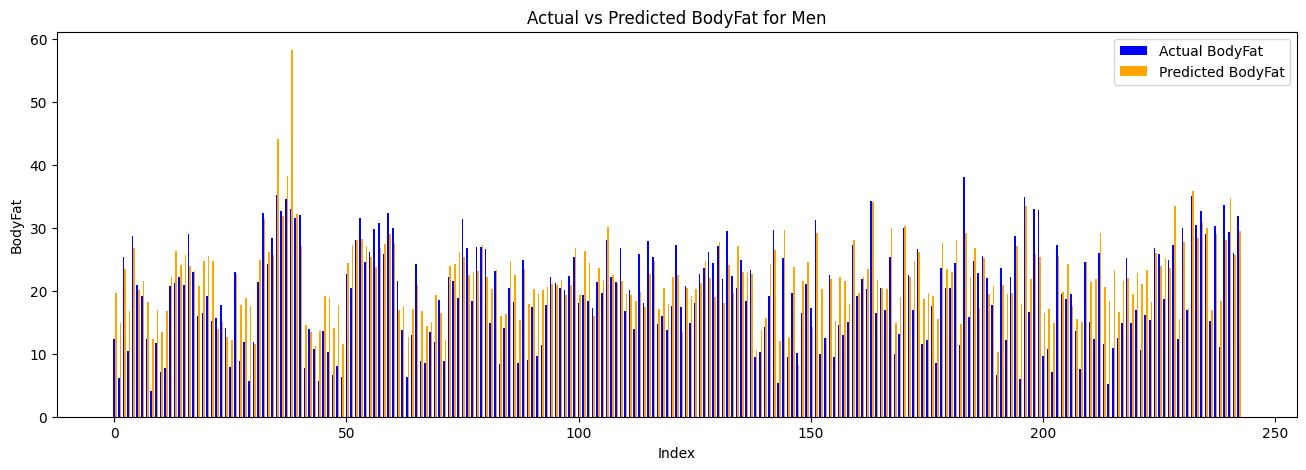

In [18]:
# Visualize the result
plt.figure(figsize=(16, 5))
bar_width = 0.35
index = range(len(df))

plt.bar(index, df['BodyFat'], width=bar_width, label='Actual BodyFat', color='blue')
plt.bar([i + bar_width for i in index], df['Predicted_BodyFat'], width=bar_width, label='Predicted BodyFat', color='orange')

plt.xlabel('Index')
plt.ylabel('BodyFat')
plt.legend()
plt.title("Actual vs Predicted BodyFat for Men")
plt.show()

In [19]:
test_load = tf.keras.models.load_model('best_model_neck.h5')
# Evaluate the model for neck prediction
model_neck_loss, model_neck_mae = test_load.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.9257 - mae: 0.9257


In [20]:
test_pred = test_load.predict([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
print(test_pred)

1/1 [==============================] - 0s 88ms/step
[[25.81475]]
